# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler


# Import the Dataset

In [3]:
data = pd.read_csv("C:/Users/Utkarsh/Downloads/TATASTEEL.NS.csv")
print(" Shape of the TATASTEEL 1996-2024 is: ", data.shape,"\n",
     "The number", data.shape[0], "shows number of samples and the",
     data.shape[1], "shows number of columns.")
data.head(10)

 Shape of the TATASTEEL 1996-2024 is:  (7204, 7) 
 The number 7204 shows number of samples and the 7 shows number of columns.


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.437989,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.392717,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.393329,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.317467,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.271582,30138033.0
5,1996-01-08,10.358753,10.386825,9.943280,10.033112,2.186543,36752157.0
6,1996-01-09,9.825375,10.069606,9.825375,9.985388,2.176142,36964108.0
7,1996-01-10,9.985388,10.176281,9.825375,9.932051,2.164519,35923053.0
8,1996-01-11,9.937665,10.215583,9.903978,10.165052,2.215297,27719296.0
9,1996-01-12,10.165052,10.325066,10.063991,10.125751,2.206732,31593194.0


In [4]:
#taking data from 2005-01-3 to 2023-12-29
df = pd.DataFrame(data).tail(4854).head(4695)
df.reset_index(inplace=True)
df.drop(['index'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4695 non-null   object 
 1   Open       4688 non-null   float64
 2   High       4688 non-null   float64
 3   Low        4688 non-null   float64
 4   Close      4688 non-null   float64
 5   Adj Close  4688 non-null   float64
 6   Volume     4688 non-null   float64
dtypes: float64(6), object(1)
memory usage: 256.9+ KB


In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,33.265915,33.265915,32.310047,32.613228,8.930238,50045402.0
1,2005-01-04,32.592175,32.962730,32.364788,32.587963,8.923322,46787469.0
2,2005-01-05,32.423740,32.491112,30.423573,31.076260,8.509381,95217448.0
3,2005-01-06,30.739389,31.000463,29.783520,29.947744,8.200368,92509792.0
4,2005-01-07,30.107758,30.684649,29.935112,30.431995,8.332968,63318130.0
...,...,...,...,...,...,...,...
4690,2023-12-22,132.399994,134.750000,131.750000,133.550003,130.912415,37357334.0
4691,2023-12-26,134.699997,136.100006,134.449997,135.199997,132.529816,25936447.0
4692,2023-12-27,135.850006,138.899994,135.500000,137.199997,134.490326,48101400.0
4693,2023-12-28,138.149994,138.750000,136.850006,138.149994,135.421555,34661176.0


In [6]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [7]:
df[df['Close'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
1736,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
1775,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
1905,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
1947,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2284,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2513,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#dropping nan and reindexing
df.dropna(axis=0,inplace=True)
df = df.reset_index().drop(['index'], axis=1)
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,33.265915,33.265915,32.310047,32.613228,8.930238,50045402.0
1,2005-01-04,32.592175,32.962730,32.364788,32.587963,8.923322,46787469.0
2,2005-01-05,32.423740,32.491112,30.423573,31.076260,8.509381,95217448.0
3,2005-01-06,30.739389,31.000463,29.783520,29.947744,8.200368,92509792.0
4,2005-01-07,30.107758,30.684649,29.935112,30.431995,8.332968,63318130.0
5,2005-01-10,30.562532,30.979408,30.031961,30.166710,8.260327,42122382.0
6,2005-01-11,30.250929,30.360411,29.265583,29.442438,8.062005,70024906.0
7,2005-01-12,29.492970,30.065649,28.735012,28.975033,7.934020,64340791.0
8,2005-01-13,29.476126,30.309879,29.139256,30.074072,8.234960,62068924.0
9,2005-01-14,30.141445,30.225662,29.185575,29.337168,8.033180,52895546.0


In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
df['Volume'] = df['Volume'].astype('float64')

# Volume-Price Plot

In [13]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=('TATASTEEL', 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="TATASTEEL"), 
                row=1, col=1
)

fig.update_layout(
    yaxis_title='Price',
    shapes = [dict(
        x0='2005-01-03', x1='2023-12-29', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
)

fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], showlegend=False), row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

# Adding SMA (5days, 9days and 17days)

In [14]:
df["5d_sma"] = df["Close"].rolling(5).mean()
df["9d_sma"] = df["Close"].rolling(9).mean()
df["17d_sma"] = df["Close"].rolling(17).mean()

In [15]:
df.head(17)

,Date,Open,High,Low,Close,Adj Close,Volume,5d_sma,9d_sma,17d_sma
0,2005-01-03,33.265915,33.265915,32.310047,32.613228,8.930238,50045402.0,NaN,NaN,NaN
1,2005-01-04,32.592175,32.962730,32.364788,32.587963,8.923322,46787469.0,NaN,NaN,NaN
2,2005-01-05,32.423740,32.491112,30.423573,31.076260,8.509381,95217448.0,NaN,NaN,NaN
3,2005-01-06,30.739389,31.000463,29.783520,29.947744,8.200368,92509792.0,NaN,NaN,NaN
4,2005-01-07,30.107758,30.684649,29.935112,30.431995,8.332968,63318130.0,31.331438,NaN,NaN
5,2005-01-10,30.562532,30.979408,30.031961,30.166710,8.260327,42122382.0,30.842134,NaN,NaN
6,2005-01-11,30.250929,30.360411,29.265583,29.442438,8.062005,70024906.0,30.213029,NaN,NaN
7,2005-01-12,29.492970,30.065649,28.735012,28.975033,7.934020,64340791.0,29.792784,NaN,NaN
8,2005-01-13,29.476126,30.309879,29.139256,30.074072,8.234960,62068924.0,29.818050,30.590605,NaN
9,2005-01-14,30.141445,30.225662,29.185575,29.337168,8.033180,52895546.0,29.599084,30.226598,NaN


<div style = 'border : 3px solid non;padding:10px'>
    
For filling the Nan values in **SMAs** columns, just using the exact **Close** values.
It's not effect on our prediction

In [16]:
df['5d_sma'] = df['5d_sma'].fillna(df['Close'])
df['9d_sma'] = df['9d_sma'].fillna(df['Close'])
df['17d_sma'] = df['17d_sma'].fillna(df['Close'])

In [17]:
df.head(17)

,Date,Open,High,Low,Close,Adj Close,Volume,5d_sma,9d_sma,17d_sma
0,2005-01-03,33.265915,33.265915,32.310047,32.613228,8.930238,50045402.0,32.613228,32.613228,32.613228
1,2005-01-04,32.592175,32.962730,32.364788,32.587963,8.923322,46787469.0,32.587963,32.587963,32.587963
2,2005-01-05,32.423740,32.491112,30.423573,31.076260,8.509381,95217448.0,31.076260,31.076260,31.076260
3,2005-01-06,30.739389,31.000463,29.783520,29.947744,8.200368,92509792.0,29.947744,29.947744,29.947744
4,2005-01-07,30.107758,30.684649,29.935112,30.431995,8.332968,63318130.0,31.331438,30.431995,30.431995
5,2005-01-10,30.562532,30.979408,30.031961,30.166710,8.260327,42122382.0,30.842134,30.166710,30.166710
6,2005-01-11,30.250929,30.360411,29.265583,29.442438,8.062005,70024906.0,30.213029,29.442438,29.442438
7,2005-01-12,29.492970,30.065649,28.735012,28.975033,7.934020,64340791.0,29.792784,28.975033,28.975033
8,2005-01-13,29.476126,30.309879,29.139256,30.074072,8.234960,62068924.0,29.818050,30.590605,30.074072
9,2005-01-14,30.141445,30.225662,29.185575,29.337168,8.033180,52895546.0,29.599084,30.226598,29.337168


# SMA vs Real Price

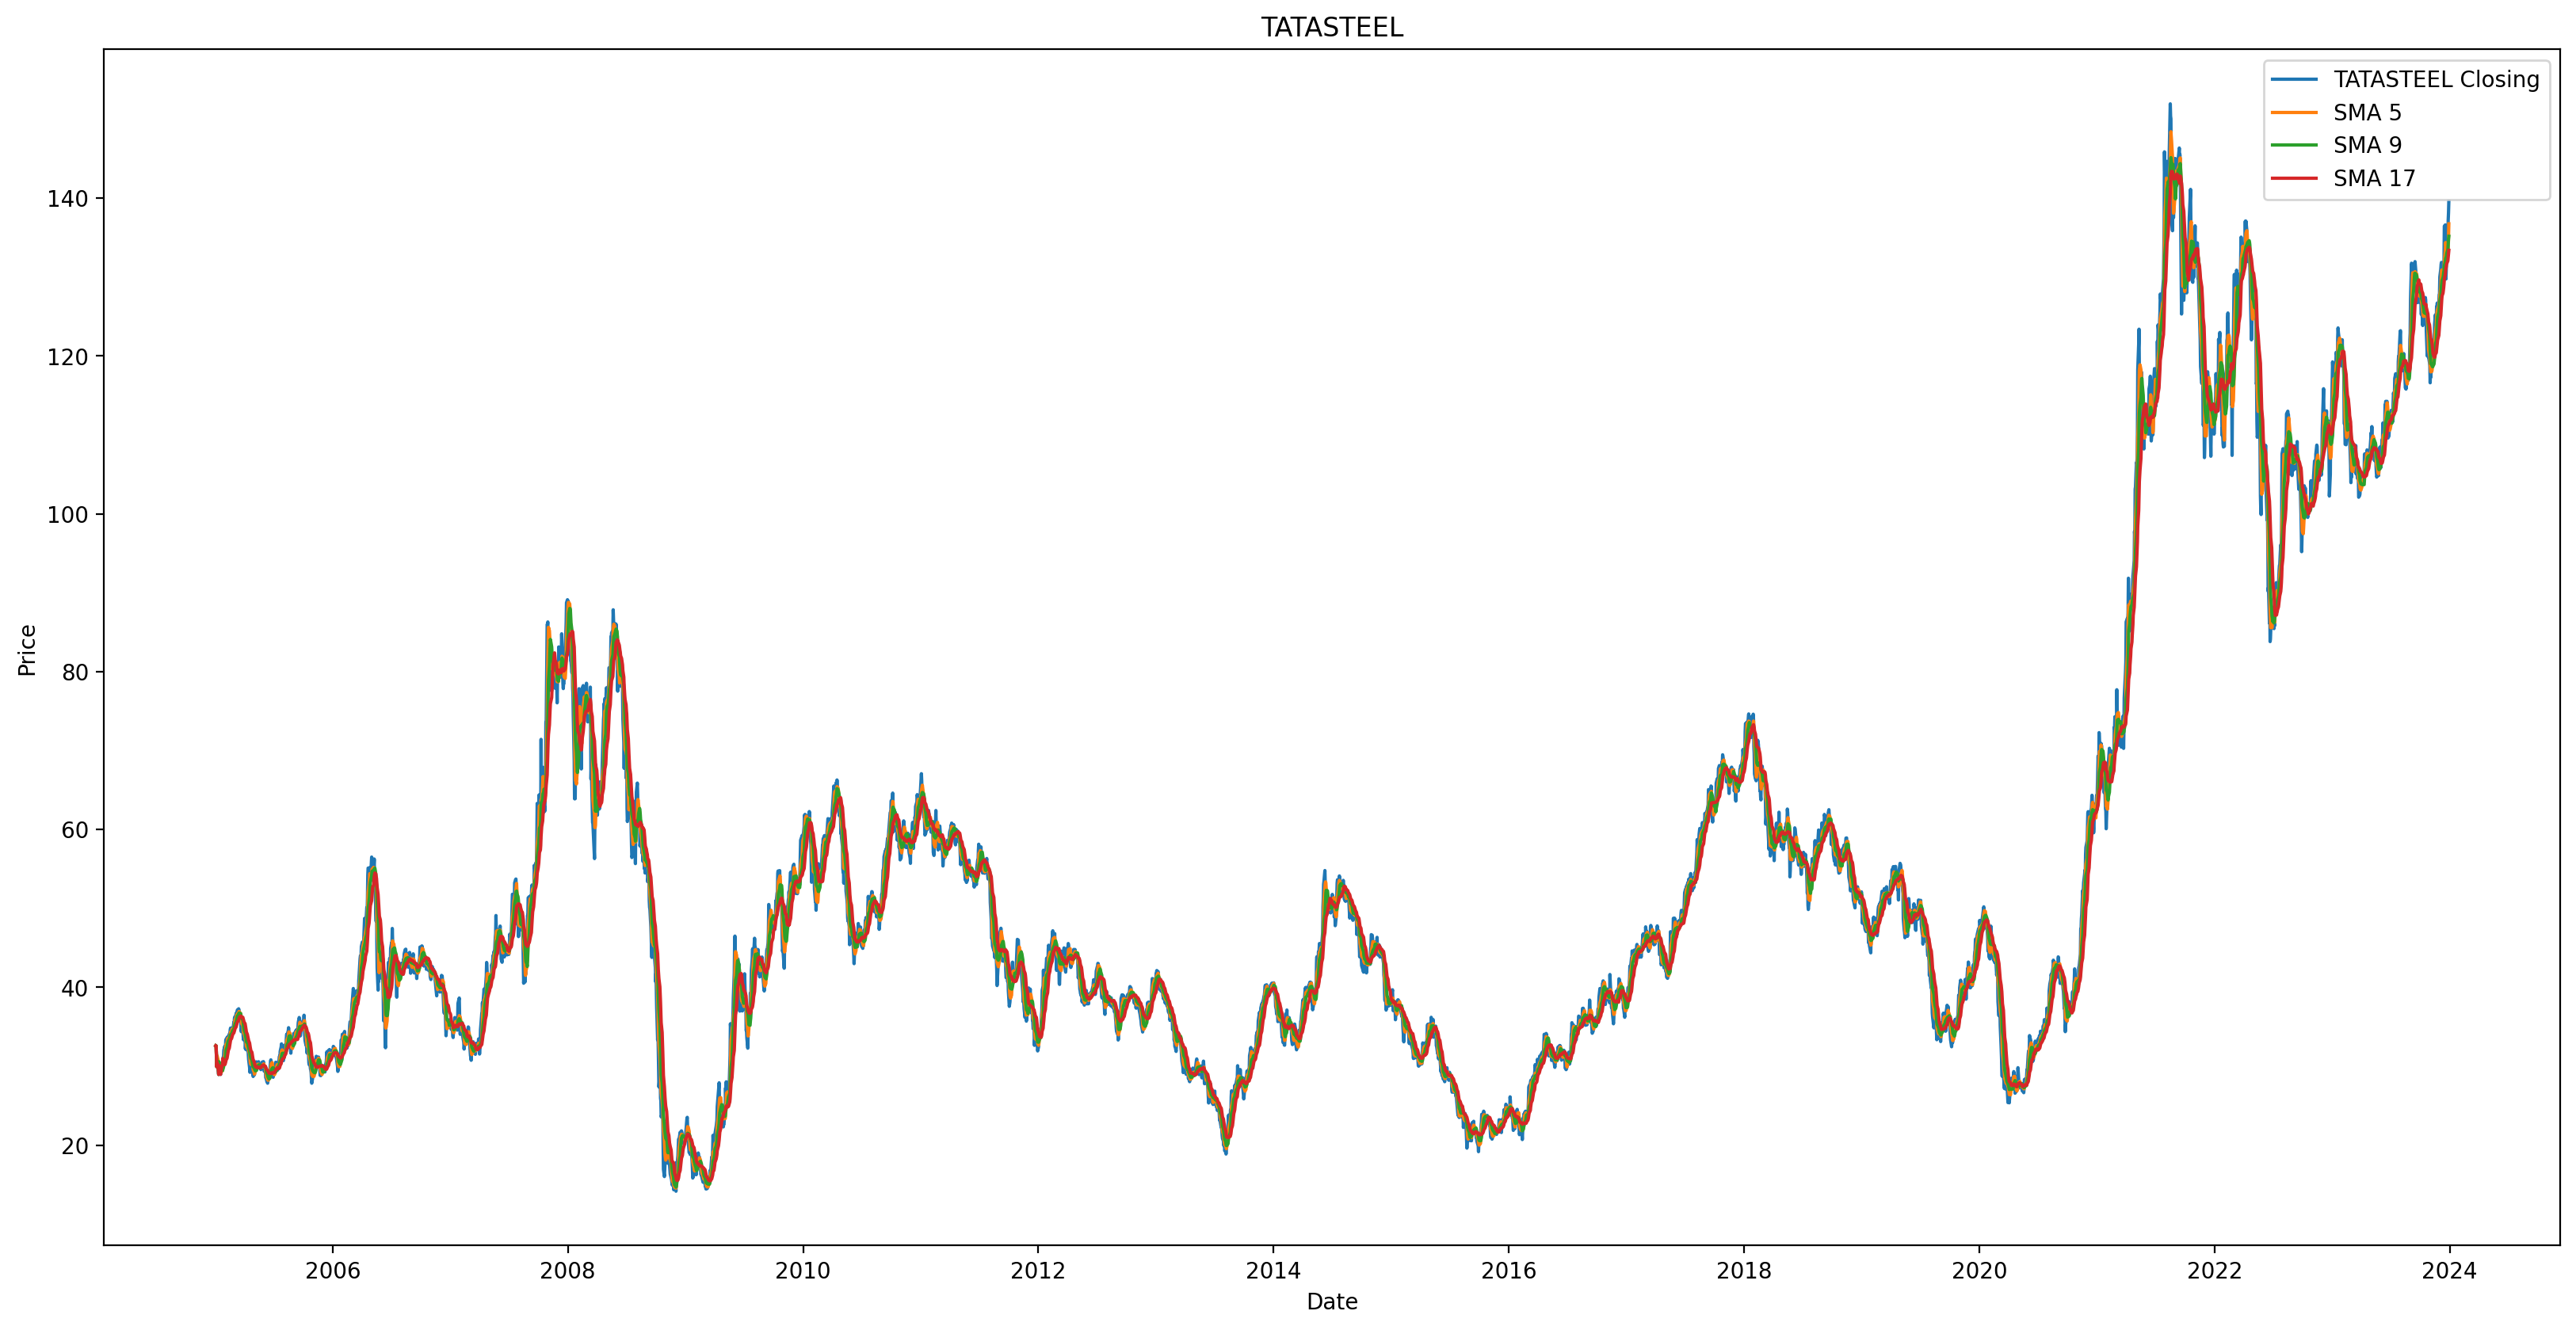

In [18]:
plt.figure(figsize=(20,10), dpi=200)
plt.plot(df['Date'], df['Close'], label='TATASTEEL Closing')
plt.plot(df['Date'], df['5d_sma'], label='SMA 5')
plt.plot(df['Date'], df['9d_sma'], label='SMA 9')
plt.plot(df['Date'], df['17d_sma'], label='SMA 17')
plt.title('TATASTEEL')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.show()

In [19]:
fig = go.Figure(data=go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="TATASTEEL"))
fig.update_layout(xaxis_rangeslider_visible=False)

fig.add_trace(go.Scatter(x=df['Date'],y=df['5d_sma'], line_color='#7295ee', name="SMA5",mode='lines'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['9d_sma'], line_color='#fcb539', name="SMA9",mode='lines'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['17d_sma'], line_color='#bd39fc', name="SMA17",mode='lines'))

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

# Bollinger Bands

In [20]:
# Define parameters
window_size = 15
num_std = 4
 
# Calculate rolling mean and standard deviation 5d
rolling_mean_5 = np.convolve(df['5d_sma'], np.ones(window_size)/window_size, mode='valid')
rolling_std_5 = np.std([df['5d_sma'][i:i+window_size] for i in range(len(df['5d_sma'])-window_size+1)], axis=1)
 
# Calculate Bollinger Bands 5d
upper_band_5 = rolling_mean_5 + num_std * rolling_std_5
lower_band_5 = rolling_mean_5 - num_std * rolling_std_5
#adding in the dataframe
df['Upper_band_5'] = np.concatenate((np.zeros(4688-len(upper_band_5)),upper_band_5))
df['Lower_band_5'] = np.concatenate((np.zeros(4688-len(upper_band_5)),lower_band_5))

# Calculate rolling mean and standard deviation 9d
rolling_mean_9 = np.convolve(df['9d_sma'], np.ones(window_size)/window_size, mode='valid')
rolling_std_9 = np.std([df['9d_sma'][i:i+window_size] for i in range(len(df['9d_sma'])-window_size+1)], axis=1)
 
# Calculate Bollinger Bands 9d 
upper_band_9 = rolling_mean_9 + num_std * rolling_std_9
lower_band_9 = rolling_mean_9 - num_std * rolling_std_9
#adding in the dataframe
df['Upper_band_9'] = np.concatenate((np.zeros(4688-len(upper_band_9)),upper_band_9))
df['Lower_band_9'] = np.concatenate((np.zeros(4688-len(upper_band_9)),lower_band_9))

# Calculate rolling mean and standard deviation 17d 
rolling_mean_17 = np.convolve(df['17d_sma'], np.ones(window_size)/window_size, mode='valid')
rolling_std_17 = np.std([df['17d_sma'][i:i+window_size] for i in range(len(df['17d_sma'])-window_size+1)], axis=1)
 
# Calculate Bollinger Bands 17d 
upper_band_17 = rolling_mean_17 + num_std * rolling_std_17
lower_band_17 = rolling_mean_17 - num_std * rolling_std_17
#adding in the dataframe
df['Upper_band_17'] = np.concatenate((np.zeros(4688-len(upper_band_17)),upper_band_17))
df['Lower_band_17'] = np.concatenate((np.zeros(4688-len(upper_band_17)),lower_band_17))
 

# Plots of Bollinger Bands

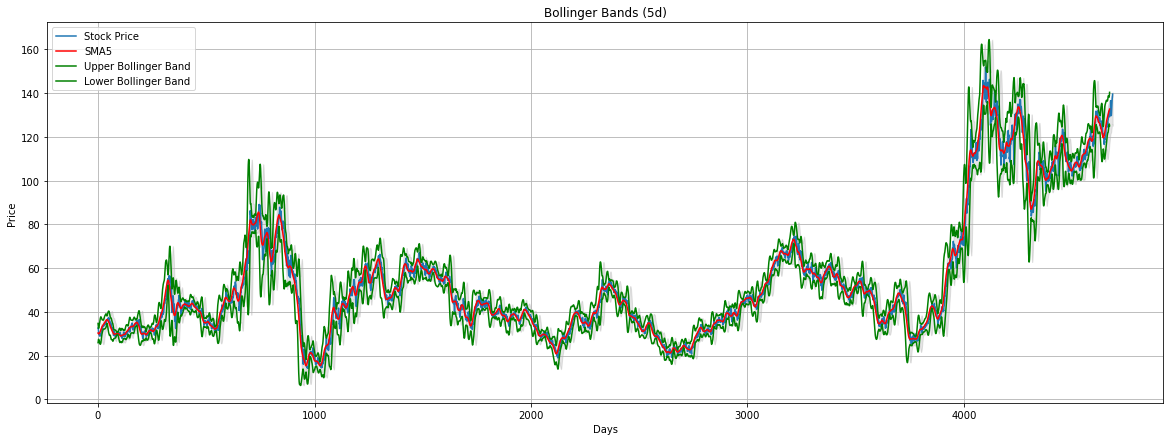

In [21]:
# Plotting 5d
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_5, label='SMA5', color='red')
plt.plot(upper_band_5, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_5, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['5d_sma'])), lower_band_5, upper_band_5, color='grey', alpha=0.2)
plt.title('Bollinger Bands (5d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

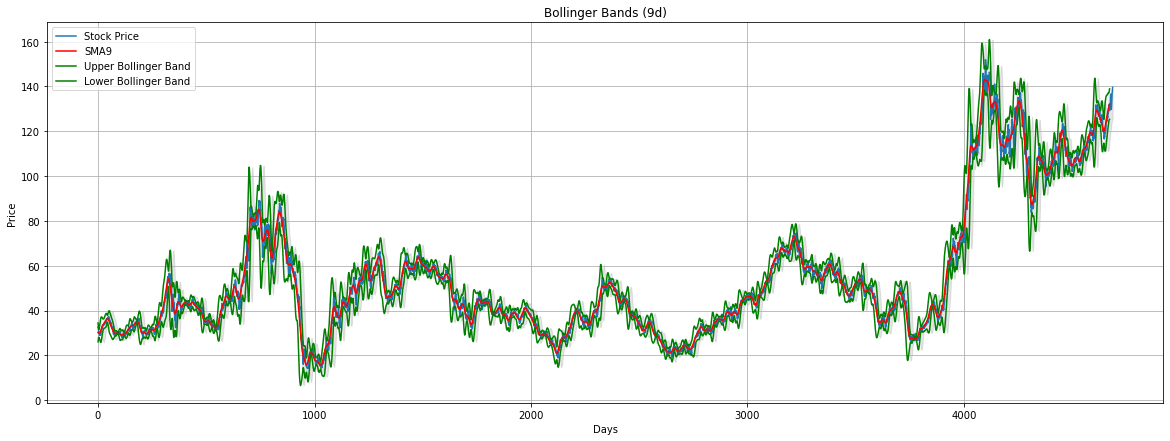

In [22]:
# Plotting 9d
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_9, label='SMA9', color='red')
plt.plot(upper_band_9, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_9, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['9d_sma'])), lower_band_9, upper_band_9,
                 color='grey', alpha=0.2)
plt.title('Bollinger Bands (9d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

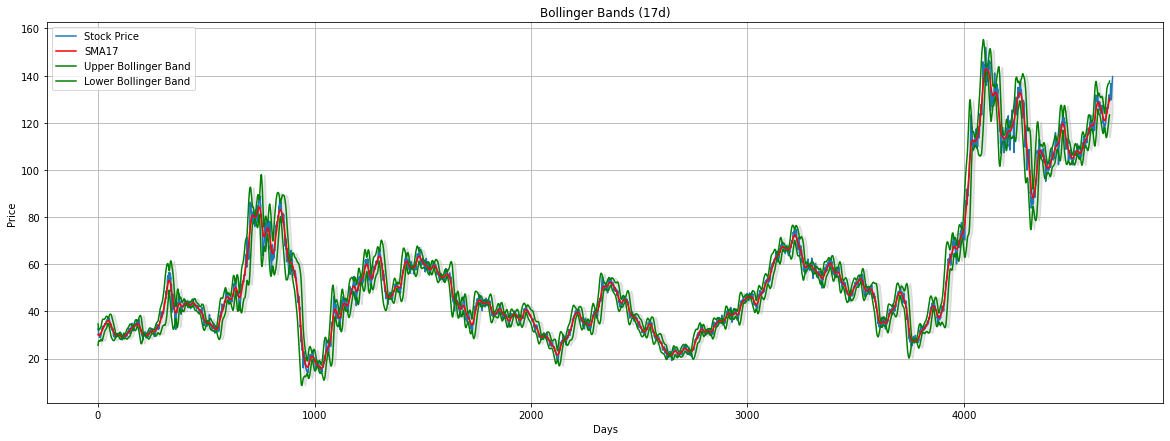

In [23]:
# Plotting
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_17, label='SMA17', color='red')
plt.plot(upper_band_17, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_17, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['17d_sma'])), lower_band_17, upper_band_17,
                 color='grey', alpha=0.2)
plt.title('Bollinger Bands (17d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Creating funtions for preprocessing and training

In [60]:
def train_test_split(df, test_size=30):
    scaler = MinMaxScaler(feature_range=(0,1))
    test_size = test_size
    train_size = int(len(df)-test_size)
    train = df.iloc[:train_size]
    scaler = scaler.fit(df)
    train_df = scaler.transform(train)
    return train_df, test_size, scaler

In [26]:
def preprocess_train(train_df, n_past=5):
    trainX = []
    trainY = []

    n_future = 1   # Number of days we want to look into the future based on the past days.
    n_past = n_past  # Number of past days we want to use to predict the future.
    #Reformat input data into a shape: (n_samples x timesteps x n_features)
    for i in range(n_past, len(train_df) - n_future +1):
        trainX.append(train_df[i - n_past:i])
        trainY.append(train_df[i + n_future - 1:i + n_future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)
    print(trainX.shape, trainY.shape)
    return trainX, trainY

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [92]:
def training(trainX, trainY):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(32, activation='tanh', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(25))
    model.add(Dense(trainY.shape[1]))

    optimizer = Adam(learning_rate=0.0001)    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mape'])
    earlyStopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint("checkpoint.model.keras", verbose = 1, save_best_only = True, monitor='val_loss')
    model.summary()
    history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=[earlyStopping, model_checkpoint])
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    return model

In [93]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [94]:
def pred(df, date, model, trainX,test_size, train_df, scaler):
    prediction = model.predict(trainX[-test_size:])
    prediction_copies = np.repeat(prediction, train_df.shape[1], axis=-1)
    y_pred = scaler.inverse_transform(prediction_copies)[:,0]
    y = df['Open'].iloc[-test_size:]
    result = pd.DataFrame({'Date': date, 'Actual Open' : y, 'Predicted Open': y_pred})
    mape = mean_absolute_percentage_error(y, y_pred)  
    mse = mean_squared_error(y, y_pred)
    return result, mape, mse

## Basic

In [95]:
basic = df[['Open','High','Low','Volume','Close']].copy(deep=True)

(4643, 15, 5) (4643, 1)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 15, 64)            17920     
                                                                 
 dropout_30 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 25)                825       
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31187 (121.82 K

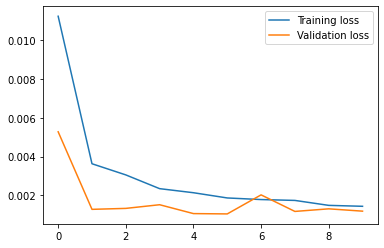

In [96]:
train_df, test_size, scaler = train_test_split(basic)
trainX, trainY = preprocess_train(train_df,n_past=15)
model = training(trainX, trainY)

In [97]:
result_basic, basic_mape, basic_mse = pred(basic, df['Date'].iloc[-test_size:], model, trainX, test_size, train_df, scaler)
print("MAPE: ", basic_mape)
print("MSE :", basic_mse)

1/1 [==============================] - 1s 932ms/step
MAPE:  0.054378032752866984
MSE : 82.84410699932141


# SMA

In [38]:
_5d = df[['Open','High','Low', '5d_sma','Volume','Close']].copy(deep=True)
_9d = df[['Open','High','Low', '9d_sma','Volume','Close']].copy(deep=True)
_17d = df[['Open','High','Low', '17d_sma','Volume','Close']].copy(deep=True)
_all_sma = df[['Open','High','Low', '5d_sma', '9d_sma', '17d_sma','Volume','Close']].copy(deep=True)

### 5 Days MA

(4643, 15, 8) (4643, 1)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_32 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 25)                825       
                                                                 
 dense_33 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

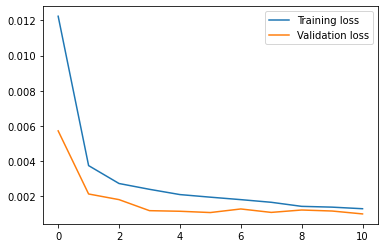

In [98]:
train_df, test_size, scaler = train_test_split(_5d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [100]:
result_5d, _5d_mape, _5d_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _5d_mape)
print("MSE :", _5d_mse)

1/1 [==============================] - 0s 44ms/step
MAPE:  0.05694276332713998
MSE : 91.64135325839496


### 9 Days MA

(4643, 15, 8) (4643, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_34 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 25)                825       
                                                                 
 dense_35 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

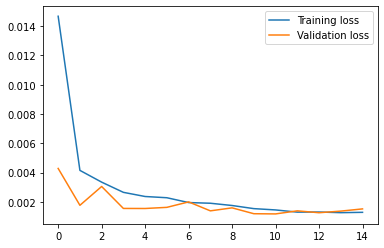

In [101]:
train_df, test_size, scaler = train_test_split(_9d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [102]:
result_9d, _9d_mape, _9d_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _9d_mape)
print("MSE :", _9d_mse)

1/1 [==============================] - 1s 900ms/step
MAPE:  0.06808532941811919
MSE : 120.18612803219345


### 17 Days MA

(4643, 15, 8) (4643, 1)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_36 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 25)                825       
                                                                 
 dense_37 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

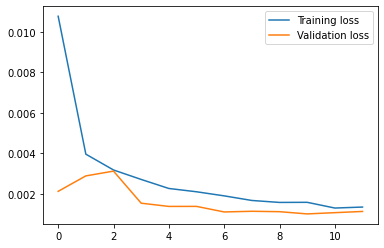

In [103]:
train_df, test_size, scaler = train_test_split(_17d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [104]:
result_17d, _17d_mape, _17d_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _17d_mape)
print("MSE :", _17d_mse)

1/1 [==============================] - 1s 1s/step
MAPE:  0.06350672670017107
MSE : 108.59471890135747


### ALL MA

(4643, 15, 8) (4643, 1)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_38 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 25)                825       
                                                                 
 dense_39 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

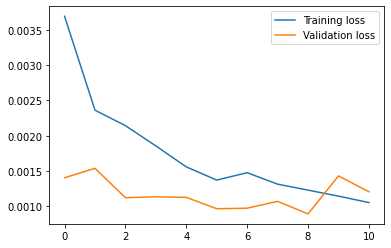

In [105]:
train_df, test_size, scaler = train_test_split(_all_sma)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [106]:
result_all_sma, _all_sma_mape, _all_sma_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _all_sma_mape)
print("MSE :", _all_sma_mse)

1/1 [==============================] - 1s 878ms/step
MAPE:  0.05555268187498504
MSE : 87.4842381074143


## Bollinger Band

In [107]:
_5d = df[['Open','High','Low', '5d_sma','Volume','Close', 'Upper_band_5', 'Lower_band_5']].copy(deep=True)
_9d = df[['Open','High','Low', '9d_sma','Volume','Close', 'Upper_band_9', 'Lower_band_9']].copy(deep=True)
_17d = df[['Open','High','Low', '17d_sma','Volume','Close', 'Upper_band_17', 'Lower_band_17']].copy(deep=True)
_all = df[['Open','High','Low', '5d_sma', '9d_sma', '17d_sma','Volume','Close', 'Upper_band_5', 'Lower_band_5', 'Upper_band_9', 'Lower_band_9', 'Upper_band_17', 'Lower_band_17']].copy(deep=True)

### 5days MA & Bollinger

(4643, 15, 8) (4643, 1)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_40 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 25)                825       
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

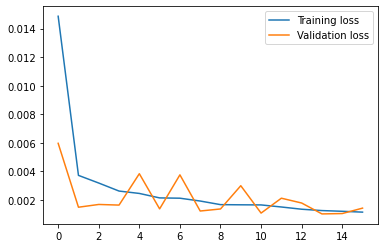

In [108]:
train_df, test_size, scaler = train_test_split(_5d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [109]:
result_5d_bb, _5d_bb_mape, _5d_bb_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _5d_bb_mape)
print("MSE :", _5d_bb_mse)

1/1 [==============================] - 1s 1s/step
MAPE:  0.059247112482261464
MSE : 95.97900047038166


### 9 days MA & Bollinger

(4643, 15, 8) (4643, 1)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_42 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_43 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 25)                825       
                                                                 
 dense_43 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

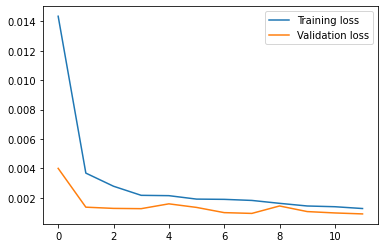

In [110]:
train_df, test_size, scaler = train_test_split(_9d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [111]:
result_9d_bb, _9d_bb_mape, _9d_bb_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX,test_size, train_df, scaler)
print("MAPE: ", _9d_bb_mape)
print("MSE :", _9d_bb_mse)

1/1 [==============================] - 1s 996ms/step
MAPE:  0.06737195081957967
MSE : 120.10323078058317


### 17 days MA & Bollinger

(4643, 15, 8) (4643, 1)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 15, 64)            18688     
                                                                 
 dropout_44 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_45 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 25)                825       
                                                                 
 dense_45 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31955 (124.82 K

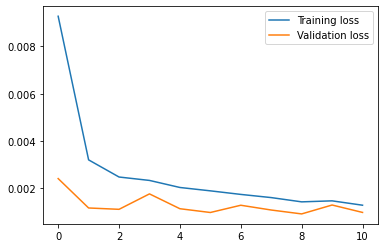

In [112]:
train_df, test_size, scaler = train_test_split(_17d)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [113]:
result_17d_bb, _17d_bb_mape, _17d_bb_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX, test_size, train_df, scaler)
print("MAPE: ", _17d_bb_mape)
print("MSE :", _17d_bb_mse)

1/1 [==============================] - 1s 1s/step
MAPE:  0.061634173303812066
MSE : 104.08088526797492


### All MA & Bollinger Bands

(4643, 15, 14) (4643, 1)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 15, 64)            20224     
                                                                 
 dropout_46 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_47 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 25)                825       
                                                                 
 dense_47 (Dense)            (None, 1)                 26        
                                                                 
Total params: 33491 (130.82 

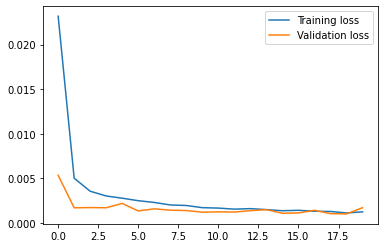

In [114]:
train_df, test_size, scaler = train_test_split(_all)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [115]:
result_all_bb, _all_bb_mape, _all_bb_mse = pred(df, df['Date'].iloc[-test_size:], model, trainX, test_size, train_df, scaler)
print("MAPE: ", _all_bb_mape)
print("MSE :", _all_bb_mse)

1/1 [==============================] - 1s 880ms/step
MAPE:  0.0639736752896746
MSE : 109.39015214575647


# Result

In [116]:
result2 = {
    'basic' : basic_mape,
    '5d_MA' : _5d_mape,
    '9d_MA' : _9d_mape,
    '17d_MA': _17d_mape,
    'All_SMAs': _all_sma_mape,
    '5d_BB' : _5d_bb_mape,
    '9d_BB' : _9d_bb_mape,
    '17d_BB': _17d_bb_mape,
    'All_SMAs_BBs' : _all_bb_mape
}

In [117]:
result2

{'basic': 0.054378032752866984,
 '5d_MA': 0.05694276332713998,
 '9d_MA': 0.06808532941811919,
 '17d_MA': 0.06350672670017107,
 'All_SMAs': 0.05555268187498504,
 '5d_BB': 0.059247112482261464,
 '9d_BB': 0.06737195081957967,
 '17d_BB': 0.061634173303812066,
 'All_SMAs_BBs': 0.0639736752896746}

(4668, 15, 14) (4668, 1)
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 15, 64)            20224     
                                                                 
 dropout_52 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_53 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_53 (Dropout)        (None, 32)                0         
                                                                 
 dense_52 (Dense)            (None, 25)                825       
                                                                 
 dense_53 (Dense)            (None, 1)                 26        
                                                                 
Total params: 33491 (130.82 

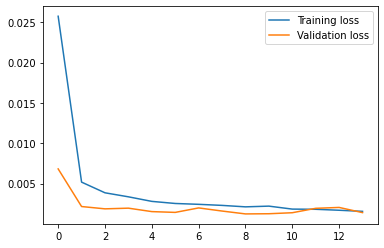

In [131]:
train_df, test_size, scaler = train_test_split(_all, test_size= 5)
trainX, trainY = preprocess_train(train_df, n_past=15)
model = training(trainX, trainY)

In [132]:
result, mape, mse = pred(df, df['Date'].iloc[-test_size:], model, trainX, test_size, train_df, scaler)
print("MAPE: ", mape)
print("MSE :", mse)

1/1 [==============================] - 1s 1s/step
MAPE:  0.038922363791916936
MSE : 30.45214981103495


In [133]:
result

,Date,Actual Open,Predicted Open
4683,2023-12-22,132.399994,129.487640
4684,2023-12-26,134.699997,130.021957
4685,2023-12-27,135.850006,130.611664
4686,2023-12-28,138.149994,131.226883
4687,2023-12-29,138.600006,131.779068


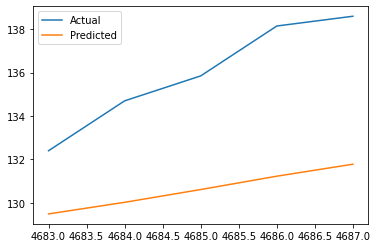

In [134]:
plt.plot(result['Actual Open'], label = "Actual")
plt.plot(result['Predicted Open'], label = "Predicted")
plt.legend()